## Importing The Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

## Setting UP Working Directory

In [4]:
os.chdir("C:/users/Raaz/Documents/Data Science/Santander Customer TransactionPrediction")

In [5]:
os.getcwd()

'C:\\users\\Raaz\\Documents\\Data Science\\Santander Customer TransactionPrediction'

## Importing The Dataset

In [6]:
train = pd.read_csv('train.csv')

In [7]:
test = pd.read_csv('test.csv')

In [8]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [10]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [11]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [13]:
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

## Missing Value Analysis

In [14]:
Train_Missing_Values = pd.DataFrame(train.isna().sum(),columns=['No Of Missing Values'])
Train_Missing_Values

No Of Missing Values
ID_code                     0
target                      0
var_0                       0
var_1                       0
var_2                       0
...                       ...
var_195                     0
var_196                     0
var_197                     0
var_198                     0
var_199                     0

[202 rows x 1 columns]

In [15]:
Test_Missing_Values = pd.DataFrame(test.isna().sum(),columns=['No Of Missing Values'])
Test_Missing_Values

No Of Missing Values
ID_code                     0
var_0                       0
var_1                       0
var_2                       0
var_3                       0
...                       ...
var_195                     0
var_196                     0
var_197                     0
var_198                     0
var_199                     0

[201 rows x 1 columns]

In [16]:
print('No of Missing Value in Train Set:',Train_Missing_Values['No Of Missing Values'].sum())

No of Missing Value in Train Set: 0


In [17]:
print('No of Missing Value in Test Set:',Test_Missing_Values['No Of Missing Values'].sum())

No of Missing Value in Test Set: 0


## Data Visualisation

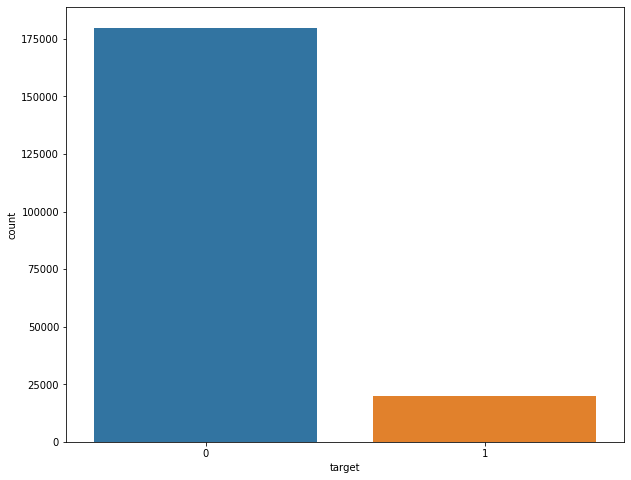

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(train['target'])

Distributions columns


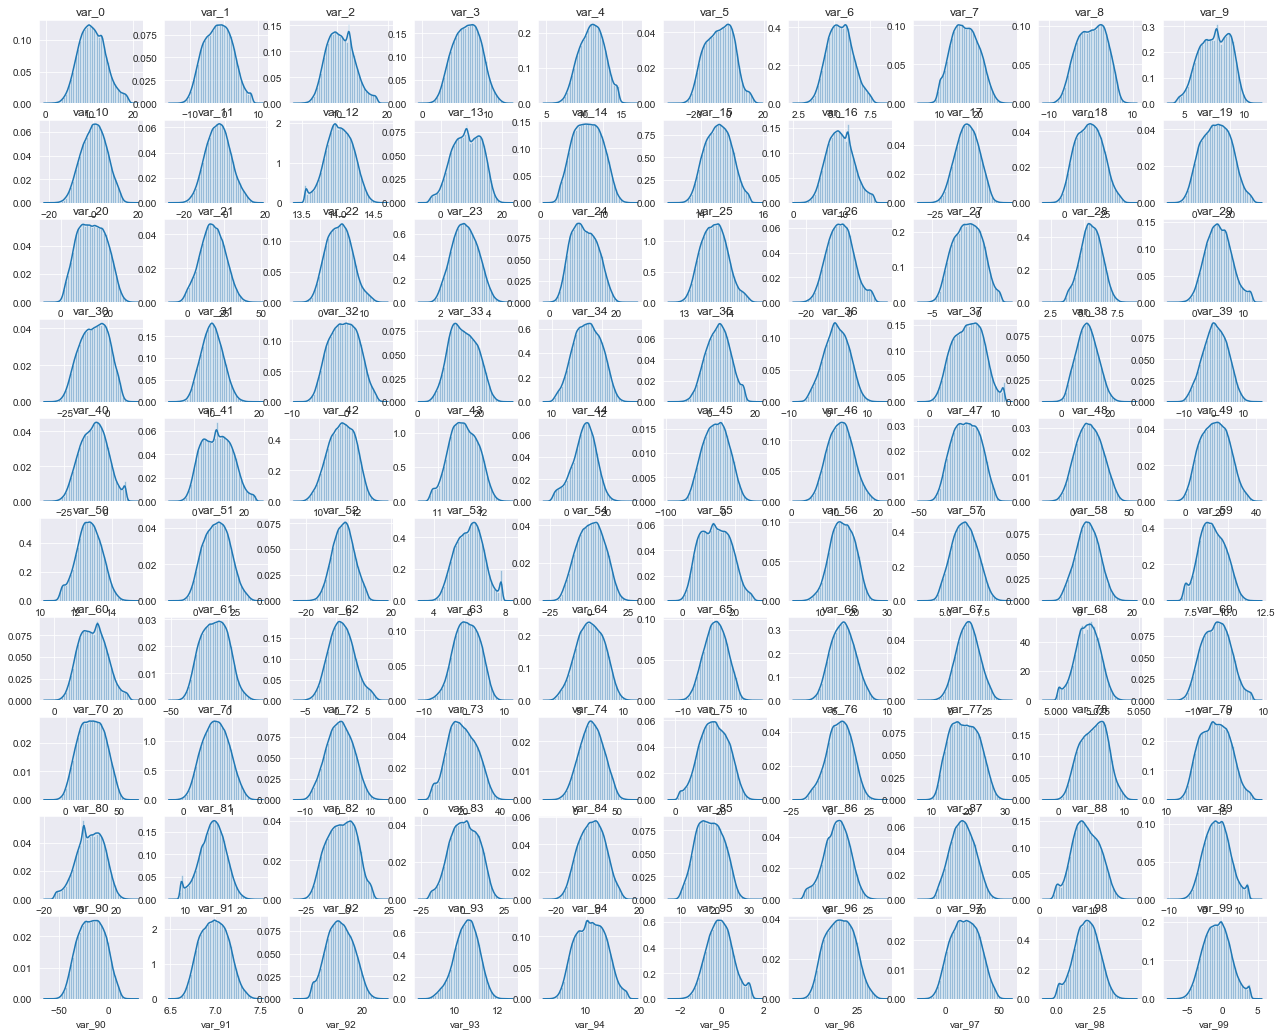

In [19]:
numerical_features = train.columns[2:102]
print('Distributions columns')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.distplot(train[col]) 
    plt.title(col)

Distributions columns


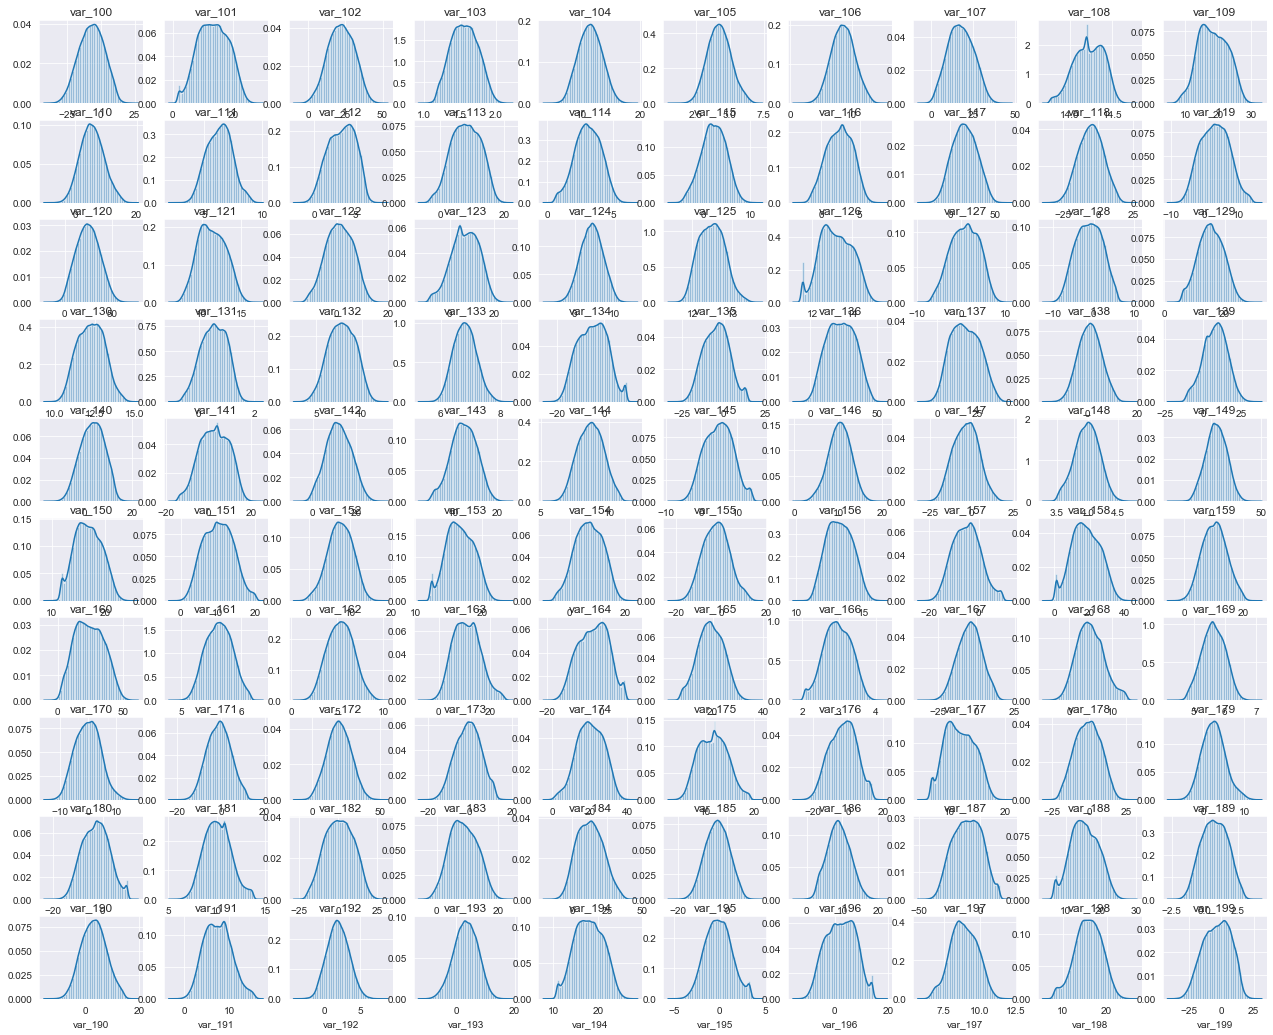

In [20]:
numerical_features = train.columns[102:]
print('Distributions columns')
plt.figure(figsize=(22,18))
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.distplot(train[col]) 
    plt.title(col)

Distributions columns


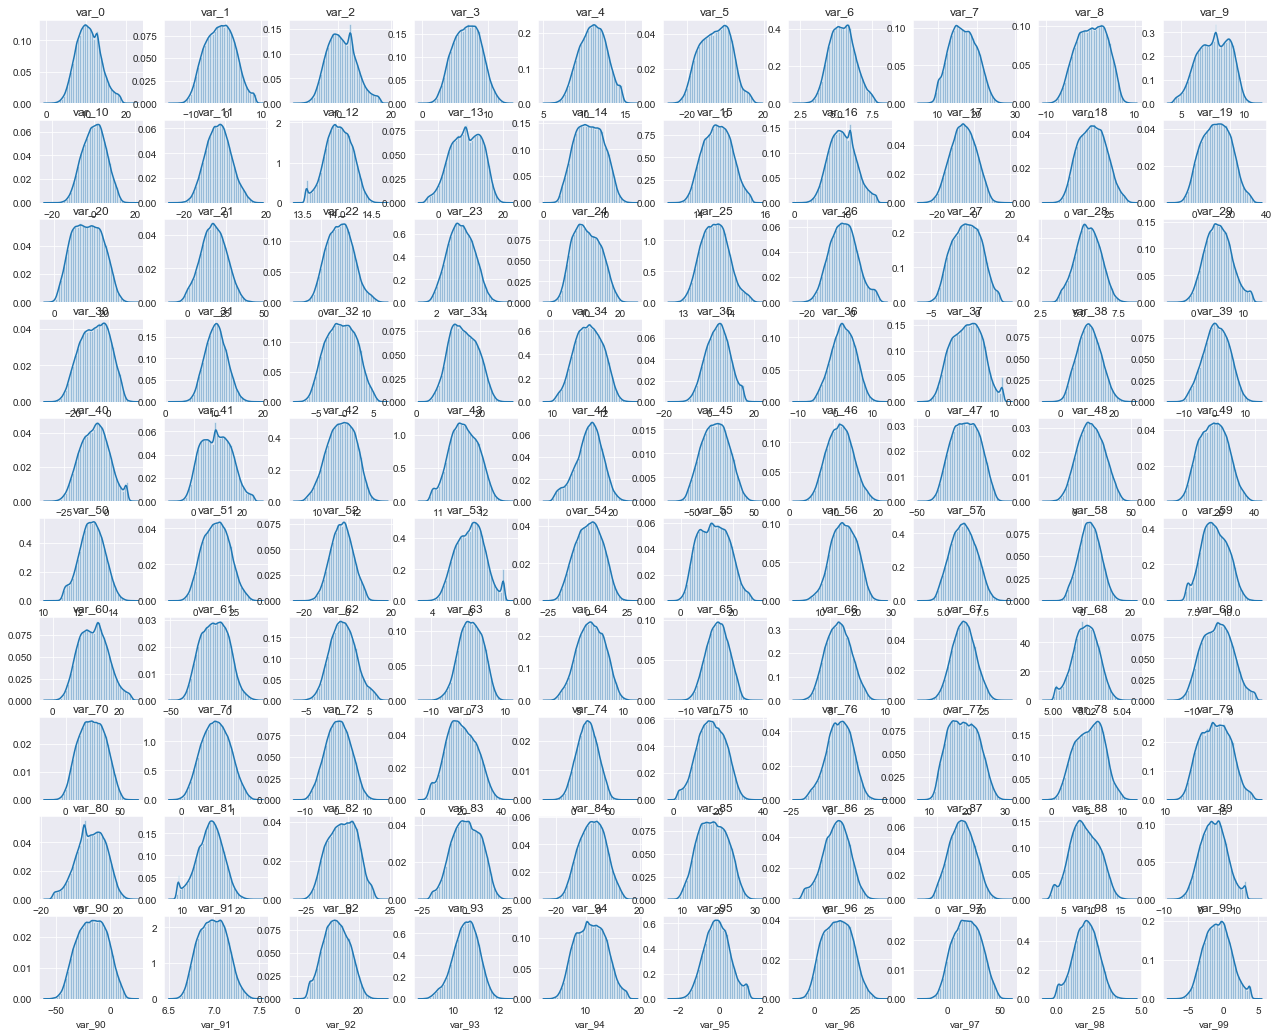

In [21]:
numerical_features = test.columns[1:101]
print('Distributions columns')
plt.figure(figsize=(22,18))
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.distplot(test[col]) 
    plt.title(col)

Distributions columns


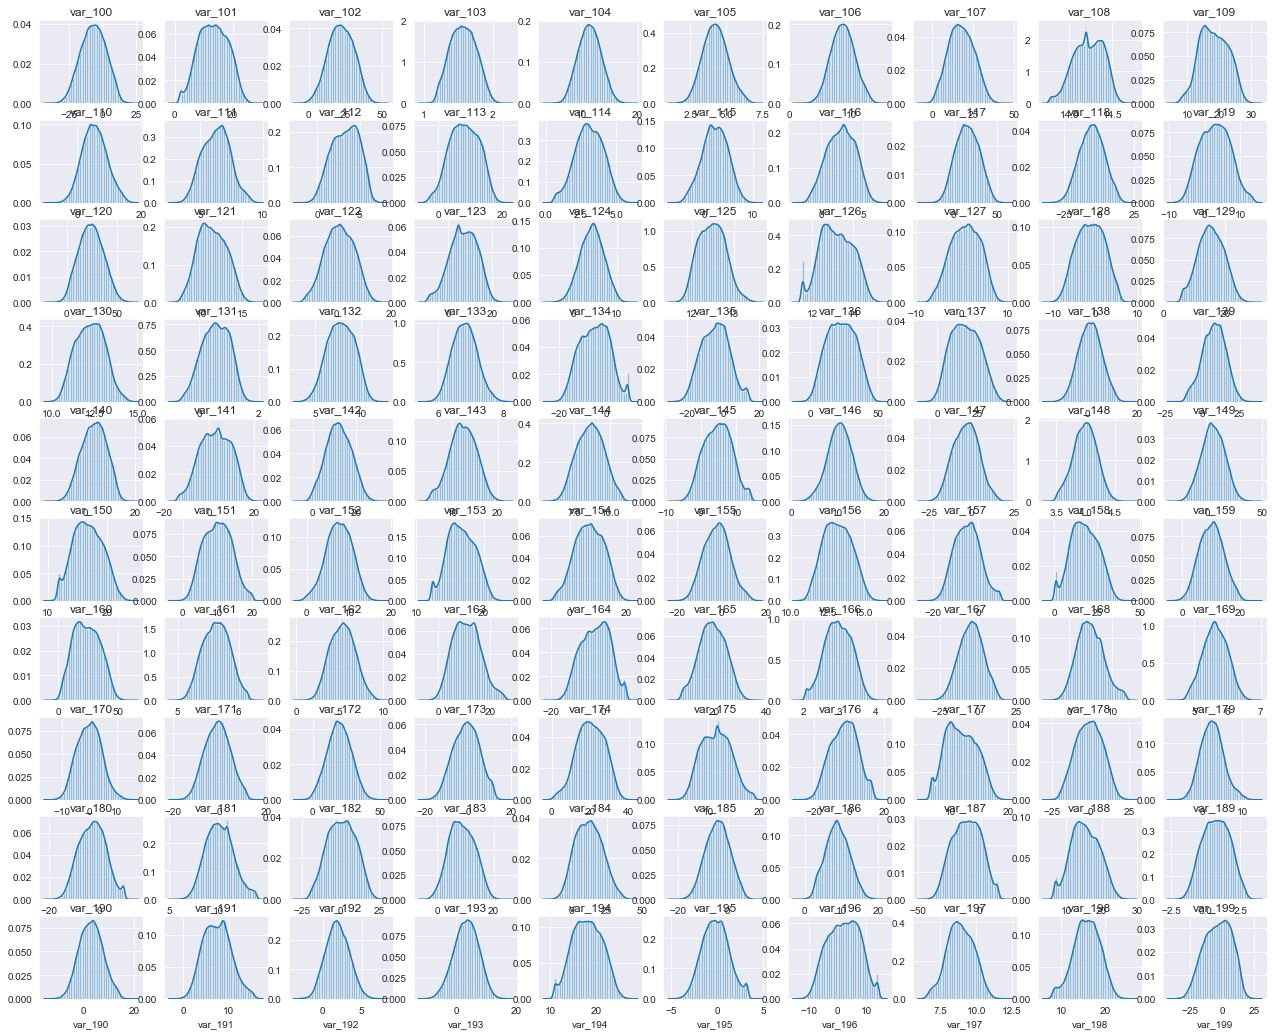

In [22]:
numerical_features = test.columns[101:]
print('Distributions columns')
plt.figure(figsize=(22,18))
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.distplot(test[col]) 
    plt.title(col)

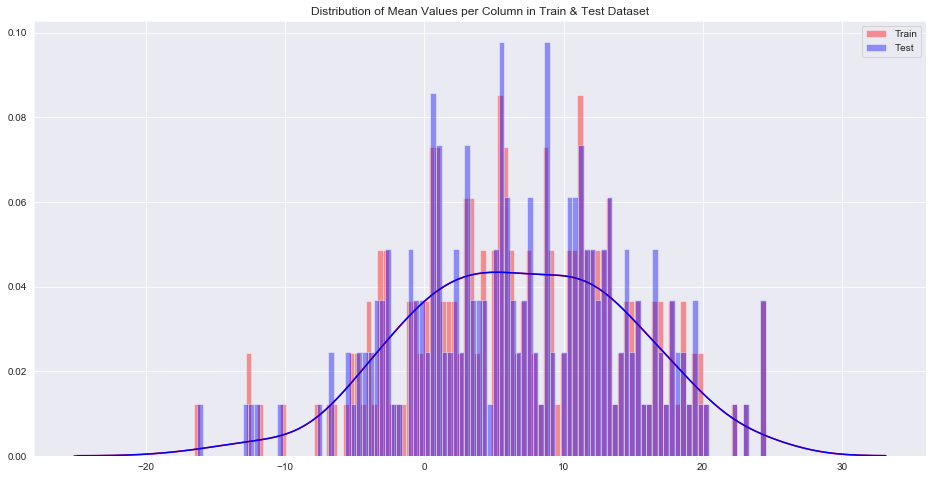

In [23]:
plt.figure(figsize=(16,8))
#Train Features-
train_features=train.columns.values[2:]

#Test Features-
test_features=test.columns.values[1:]

#Distribution plot for mean values per column in Train Features:
sns.distplot(train[train_features].mean(axis=0),color='red',kde=True,bins=100,label='Train')

#Distribution plot for mean values per column in Test Features:
sns.distplot(test[test_features].mean(axis=0),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Mean Values per Column in Train & Test Dataset')
plt.legend()
plt.show()

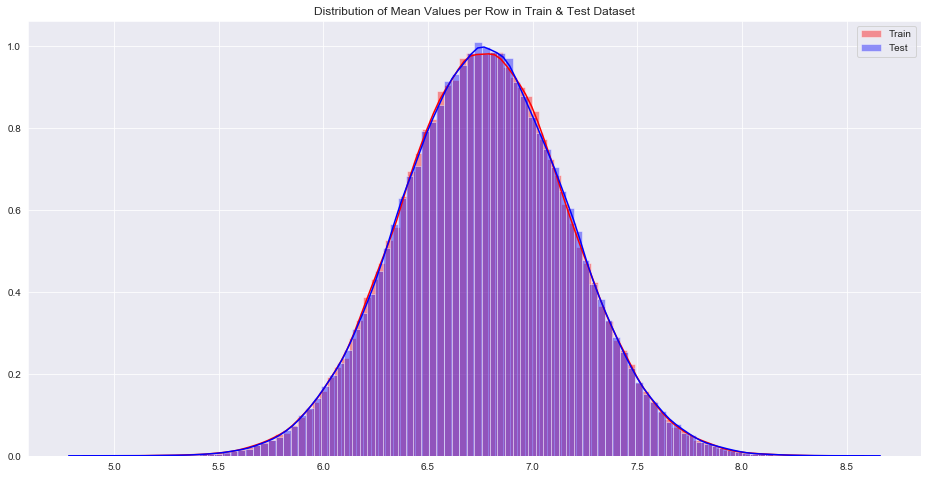

In [24]:
plt.figure(figsize=(16,8))

#Distribution plot for mean values per Row in Train Features:
sns.distplot(train[train_features].mean(axis=1),color='red',kde=True,bins=100,label='Train')

#Distribution plot for mean values per Row in Test Features:
sns.distplot(test[test_features].mean(axis=1),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Mean Values per Row in Train & Test Dataset')
plt.legend()
plt.show()


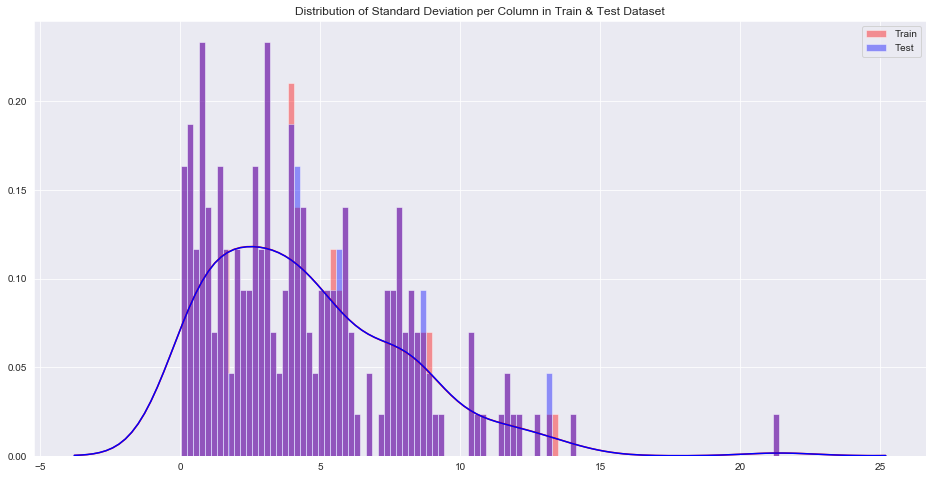

In [25]:
plt.figure(figsize=(16,8))

#Distribution plot for Standard Deviation per column in Train Features:
sns.distplot(train[train_features].std(axis=0),color='red',kde=True,bins=100,label='Train')

#Distribution plot for Standard Deviation per column in Test Features:
sns.distplot(test[test_features].std(axis=0),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Standard Deviation per Column in Train & Test Dataset')
plt.legend()
plt.show()

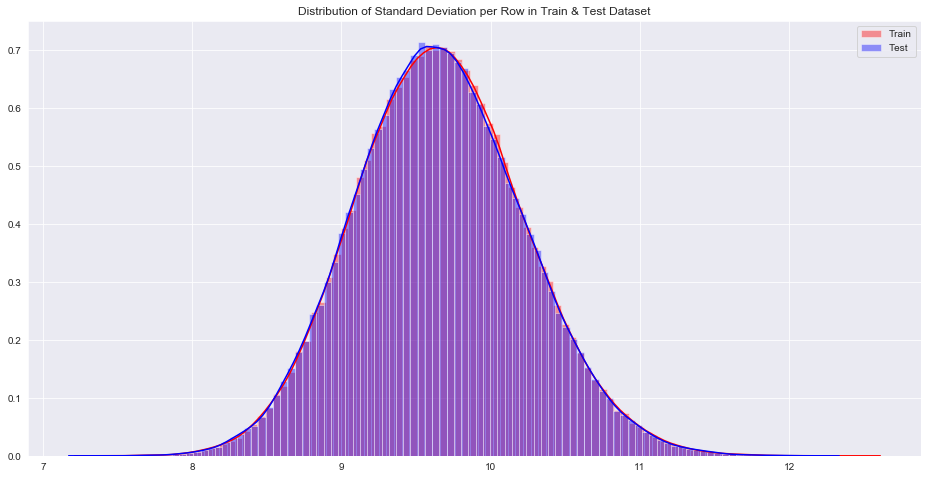

In [26]:
plt.figure(figsize=(16,8))

#Distribution plot for Standard Deviation per Row in Train Features:
sns.distplot(train[train_features].std(axis=1),color='red',kde=True,bins=100,label='Train')

#Distribution plot for Standard Deviation per Row in Test Featuress:
sns.distplot(test[test_features].std(axis=1),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Standard Deviation per Row in Train & Test Dataset')
plt.legend()
plt.show()

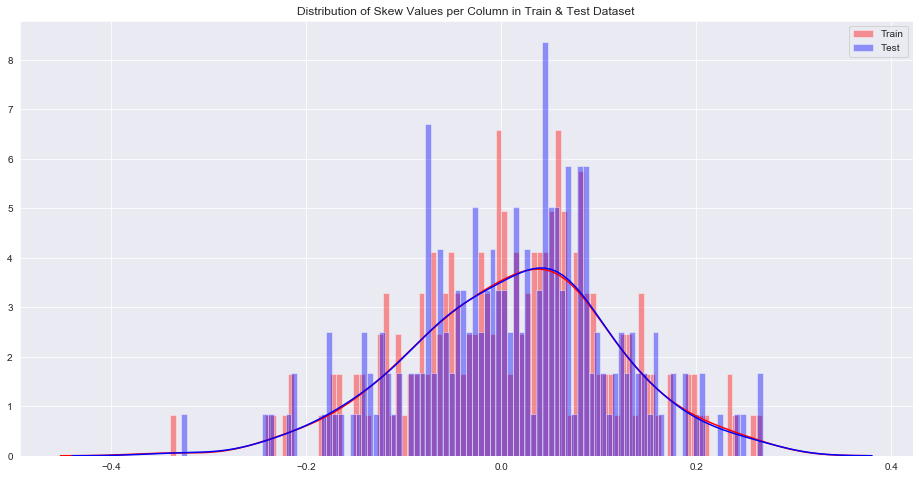

In [27]:
plt.figure(figsize=(16,8))

#Distribution plot for Skew Values per column in Train Features::
sns.distplot(train[train_features].skew(axis=0),color='red',kde=True,bins=100,label='Train')

#Distribution plot for Skew Values per column in Test Features::
sns.distplot(test[test_features].skew(axis=0),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Skew Values per Column in Train & Test Dataset')
plt.legend()
plt.show()

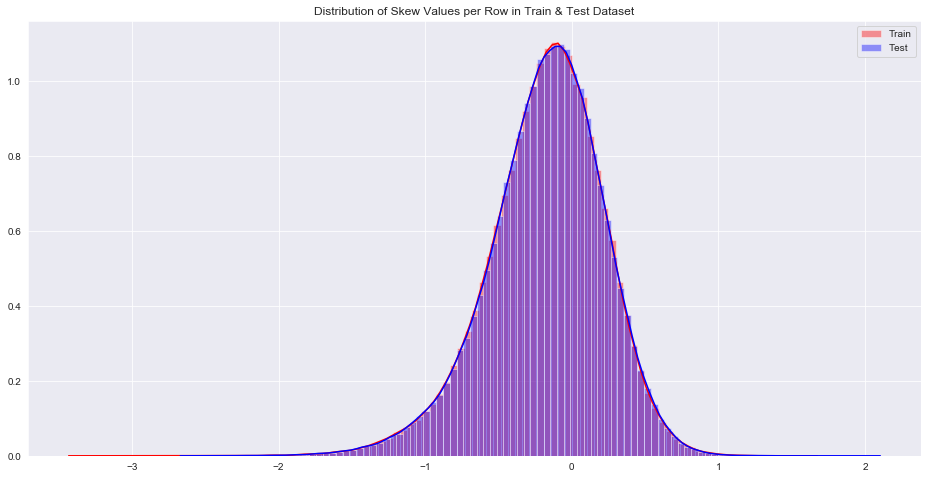

In [28]:
plt.figure(figsize=(16,8))

#Distribution plot for mean values per Row in Train Features::
sns.distplot(train[train_features].skew(axis=1),color='red',kde=True,bins=100,label='Train')

#Distribution plot for mean values per Row in Test Features::
sns.distplot(test[test_features].skew(axis=1),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Skew Values per Row in Train & Test Dataset')
plt.legend()
plt.show()

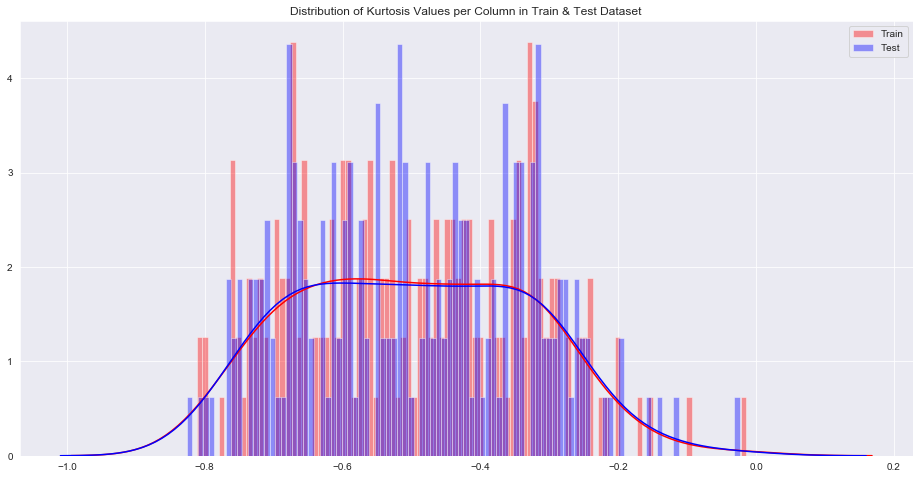

In [29]:
plt.figure(figsize=(16,8))

#Distribution plot for Kurtosis Values per column in Train Features:
sns.distplot(train[train_features].kurtosis(axis=0),color='red',kde=True,bins=100,label='Train')

#Distribution plot for Kurtosis Values per column in Test Features:
sns.distplot(test[test_features].kurtosis(axis=0),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Kurtosis Values per Column in Train & Test Dataset')
plt.legend()
plt.show()

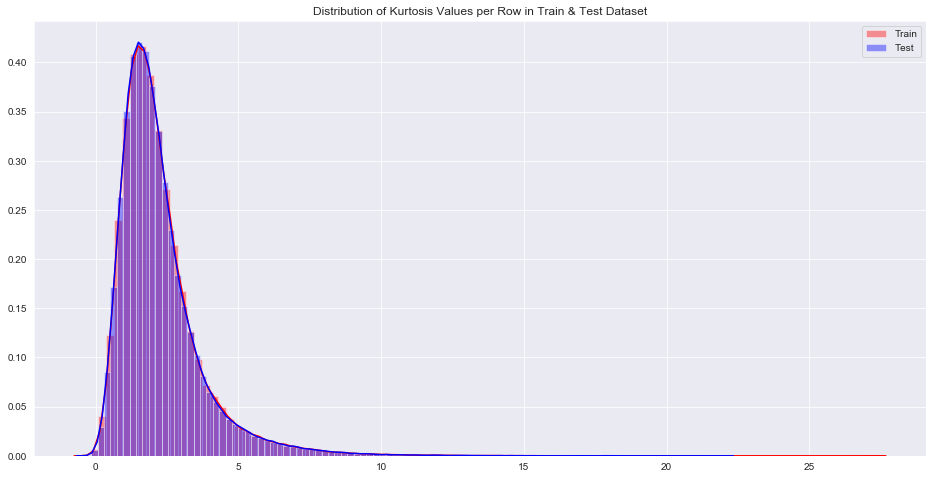

In [30]:
plt.figure(figsize=(16,8))

#Distribution plot for Kurtosis Values per Row in Train Features:
sns.distplot(train[train_features].kurtosis(axis=1),color='red',kde=True,bins=100,label='Train')

#Distribution plot for Kurtosis Values per Row in Test Features:
sns.distplot(test[test_features].kurtosis(axis=1),color='blue',kde=True,bins=100,label='Test')

plt.title('Distribution of Kurtosis Values per Row in Train & Test Dataset')
plt.legend()
plt.show()

## Feature Selection

In [31]:
train_corr = train.corr()
train_corr

target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.028285  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274   
var_196  0.023608  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880   
var_197 -0.035303 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535   
var_198 -0.053000 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953   
var_199  0.025434  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767   

            var_6     var_7     var_8  ...   var_190   var_191   var_192  \
target   0.066731 -0.003025  0.019584  ...  0.055973  0.047114 -0.042858   
var_0    0.006983  0.002429  0.004962  ...  0.002752  0.000206 -0.005373   
var_1    0.003258  0.001511  0.004098  ...  0.006627  0.003621 -0.002604   
var_2    0.000883 -0.000991  0.002648  ...  0.000197  0.001285 -0.003400   
var_3   -0.000774  0.002500  0.003553  ...  0.000151  0.002445 -0.001530   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.001244  0.001854  0.001396  ...  0.004571  0.000870 -0.004745   
var_196  0.005378  0.001045 -0.003242  ... -0.000847  0.002466 -0.001386   
var_197 -0.003565  0.003466 -0.004583  ... -0.004974  0.000906 -0.000527   
var_198 -0.003025  0.000650  0.002950  ... -0.000153 -0.000067  0.003451   
var_199  0.006096 -0.001457  0.000854  ... -0.000404  0.003595 -0.001239   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
target  -0.017709 -0.022838  0.028285  0.023608 -0.035303 -0.053000  0.025434  
var_0    0.001616 -0.001514  0.002073  0.004386 -0.000753 -0.005776  0.003850  
var_1    0.001153 -0.002557 -0.000785 -0.000377 -0.004157 -0.004861  0.002287  
var_2    0.000549  0.002104 -0.001070  0.003952  0.001078 -0.000877  0.003855  
var_3   -0.001699 -0.001054  0.001206 -0.002800  0.001164 -0.001651  0.000506  
...           ...       ...       ...       ...       ...       ...       ...  
var_195 -0.003143 -0.001201  1.000000  0.002517 -0.004170 -0.000536  0.002042  
var_196 -0.005308 -0.005040  0.002517  1.000000 -0.000454  0.000253  0.000607  
var_197  0.005068  0.000884 -0.004170 -0.000454  1.000000  0.001183  0.004991  
var_198  0.001646  0.003194 -0.000536  0.000253  0.001183  1.000000 -0.004731  
var_199 -0.000552 -0.005615  0.002042  0.000607  0.004991 -0.004731  1.000000  

[201 rows x 201 columns]

In [32]:
test_corr = test.corr()
test_corr

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0    1.000000  0.004234  0.002625  0.000847 -0.004252  0.002274  0.001930   
var_1    0.004234  1.000000  0.002912 -0.002148  0.000716  0.001393  0.003567   
var_2    0.002625  0.002912  1.000000 -0.005882  0.003657  0.000283 -0.001141   
var_3    0.000847 -0.002148 -0.005882  1.000000 -0.000959  0.001644 -0.003074   
var_4   -0.004252  0.000716  0.003657 -0.000959  1.000000  0.004822 -0.003284   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.001446  0.001339  0.001333  0.001601  0.003046  0.002676  0.000980   
var_196 -0.000754 -0.001627 -0.002400  0.003177 -0.001317 -0.002445 -0.001602   
var_197 -0.000382 -0.002839 -0.002726  0.002780  0.000425 -0.003665 -0.003378   
var_198 -0.004068 -0.003024 -0.001537 -0.002625 -0.002146 -0.004626  0.000943   
var_199  0.001248  0.001861  0.000229 -0.003034  0.000401  0.001638  0.002023   

            var_7     var_8     var_9  ...   var_190   var_191   var_192  \
var_0   -0.004654 -0.003669  0.001427  ...  0.002662  0.001151  0.001102   
var_1    0.003024  0.000778 -0.002643  ...  0.002032  0.003477 -0.003454   
var_2   -0.000273  0.001231  0.000041  ... -0.001765  0.001144 -0.005496   
var_3    0.001945 -0.001443 -0.001291  ... -0.001630  0.002119  0.001269   
var_4   -0.000167  0.003138  0.000093  ... -0.003106  0.002473 -0.000734   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.004812 -0.003241 -0.002854  ...  0.000899 -0.003857  0.000587   
var_196  0.001645  0.002765  0.001325  ...  0.000326  0.003158 -0.001467   
var_197  0.001451 -0.002954  0.002241  ... -0.002662 -0.001184  0.002277   
var_198 -0.000810 -0.001544 -0.002259  ...  0.000263 -0.003148  0.000584   
var_199  0.000624 -0.000370  0.001514  ...  0.000291 -0.001790 -0.002646   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
var_0    0.002756 -0.003509  0.001446 -0.000754 -0.000382 -0.004068  0.001248  
var_1    0.000345  0.000126  0.001339 -0.001627 -0.002839 -0.003024  0.001861  
var_2    0.002027 -0.002396  0.001333 -0.002400 -0.002726 -0.001537  0.000229  
var_3   -0.006136  0.000289  0.001601  0.003177  0.002780 -0.002625 -0.003034  
var_4   -0.000754 -0.000427  0.003046 -0.001317  0.000425 -0.002146  0.000401  
...           ...       ...       ...       ...       ...       ...       ...  
var_195  0.001951  0.000501  1.000000 -0.001346 -0.000669  0.003914 -0.003148  
var_196 -0.000119 -0.000542 -0.001346  1.000000  0.002297  0.003347  0.002055  
var_197  0.000483 -0.002226 -0.000669  0.002297  1.000000 -0.002171  0.003360  
var_198  0.000559 -0.002761  0.003914  0.003347 -0.002171  1.000000 -0.000834  
var_199 -0.001082 -0.002290 -0.003148  0.002055  0.003360 -0.000834  1.000000  

[200 rows x 200 columns]

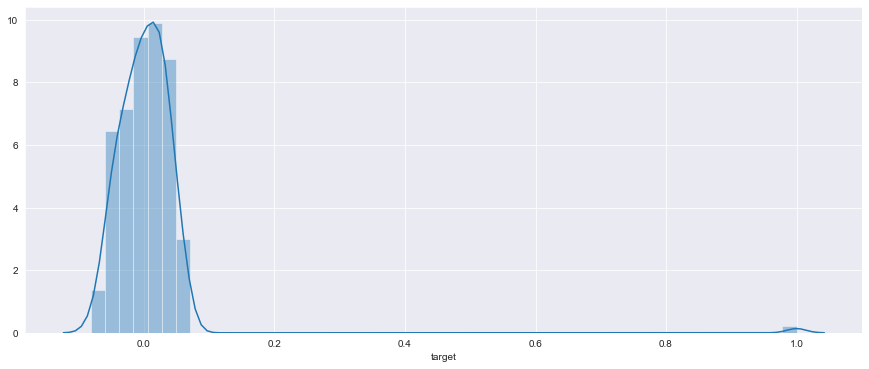

In [33]:
plt.figure(figsize=(15,6))
sns.distplot(train_corr['target'])

In [34]:
train_corr['target'].nlargest(6)

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
Name: target, dtype: float64

In [35]:
train_corr['target'][1:].sort_values()

var_81    -0.080917
var_139   -0.074080
var_12    -0.069489
var_146   -0.063644
var_76    -0.061917
             ...   
var_22     0.060558
var_26     0.062422
var_53     0.063399
var_110    0.064275
var_6      0.066731
Name: target, Length: 200, dtype: float64

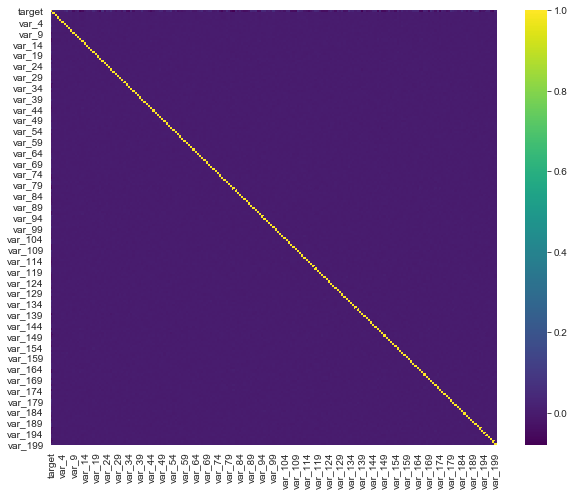

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(train_corr,cmap='viridis')

## Outlier Analysis

Boxplot of Features


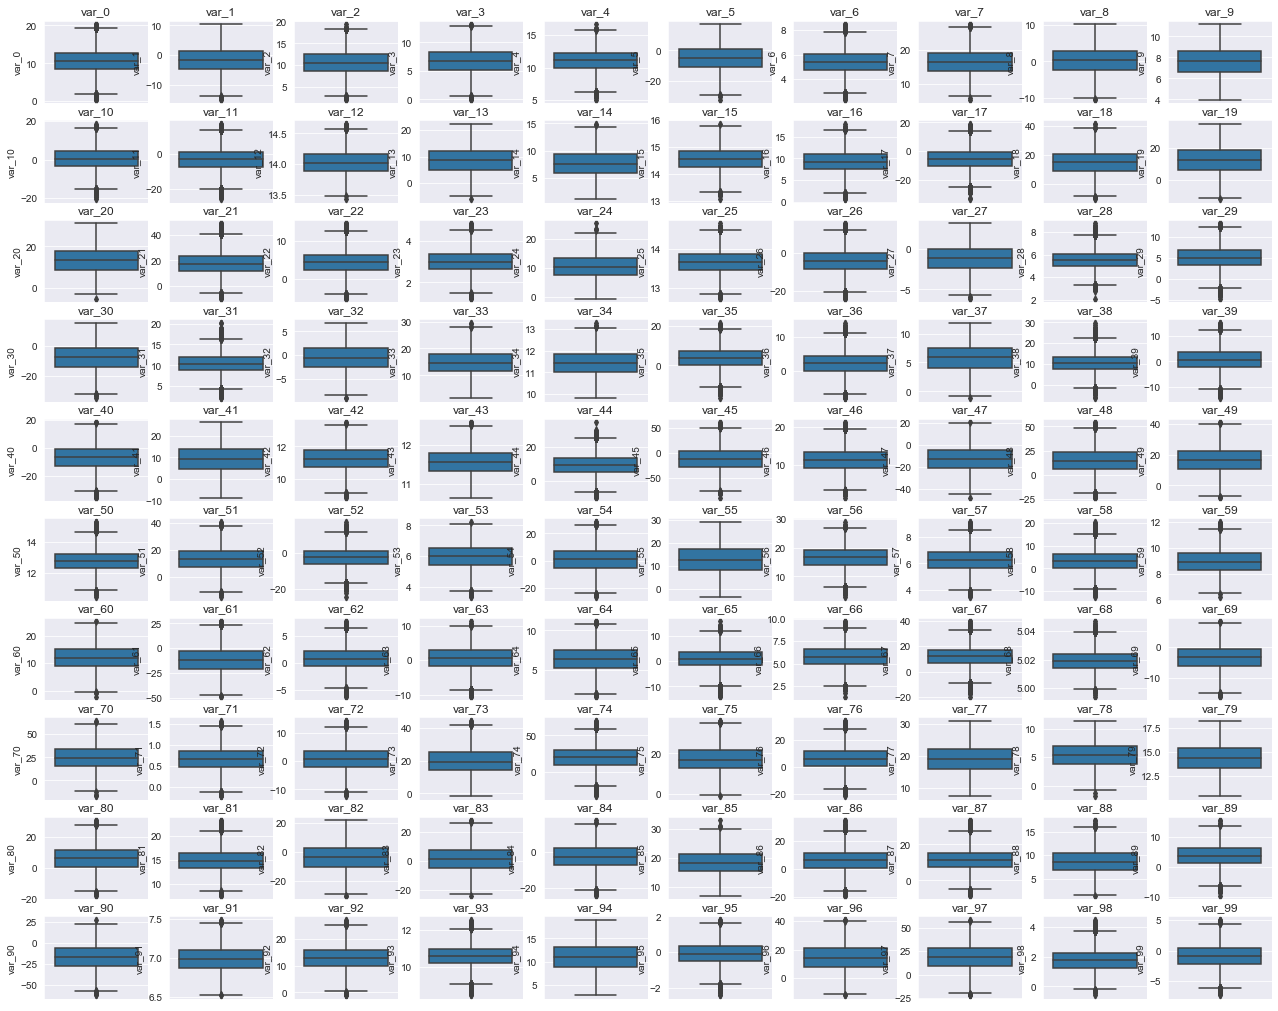

In [37]:
#Train Set Outlier Analysis from var_0 to var_99
numerical_features = train.columns[2:102]
print('Boxplot of Features')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y=train[col]) 
    plt.title(col)

Boxplot of Features


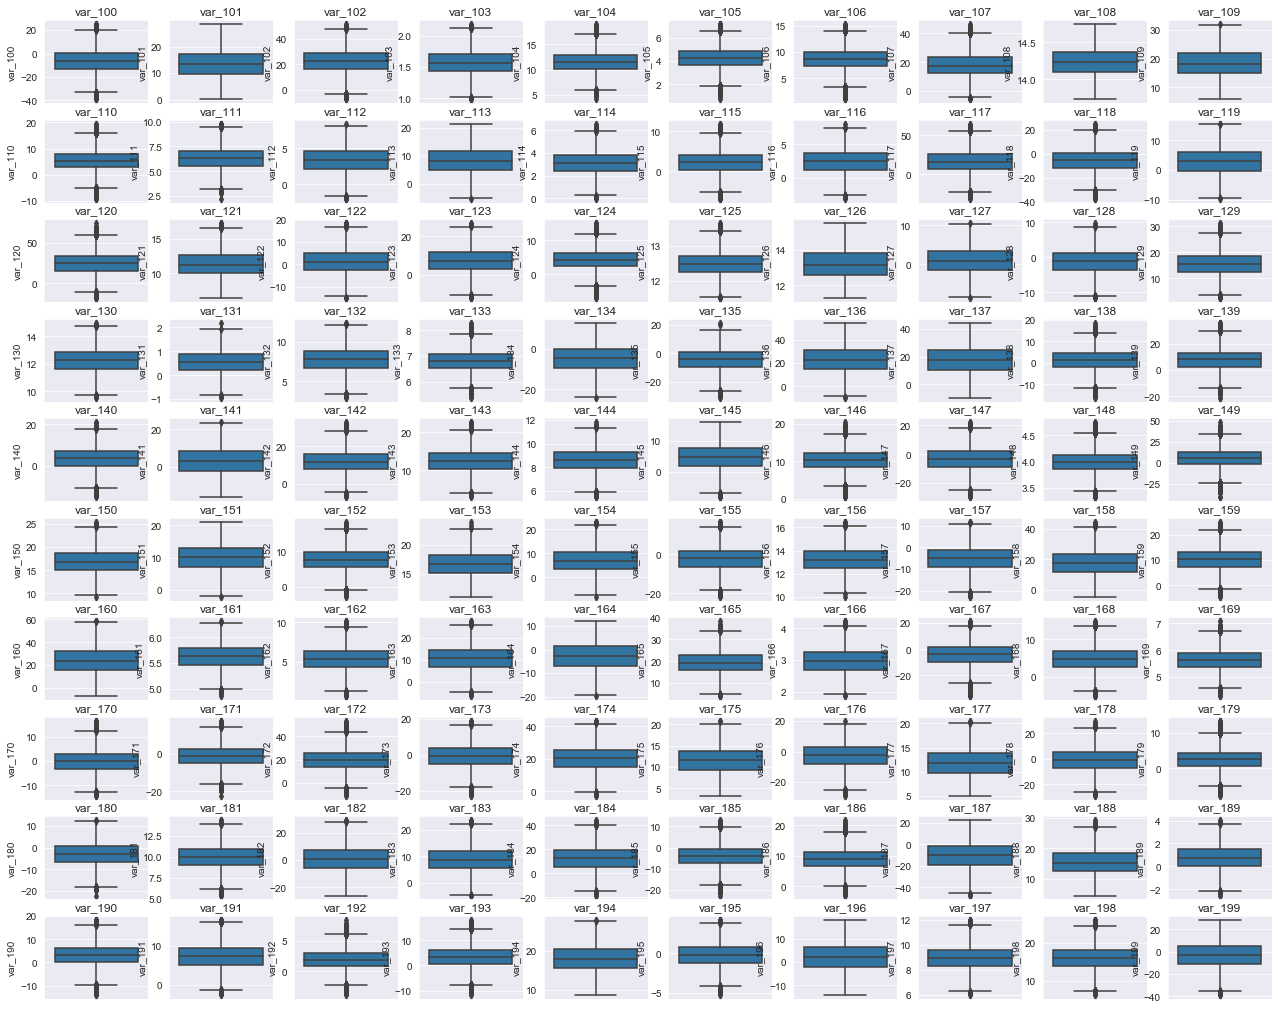

In [38]:
#Train Set Outlier Analysis from var_100 to var_199
numerical_features = train.columns[102:]
print('Boxplot of Features')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y=train[col]) 
    plt.title(col)

Boxplot of Features


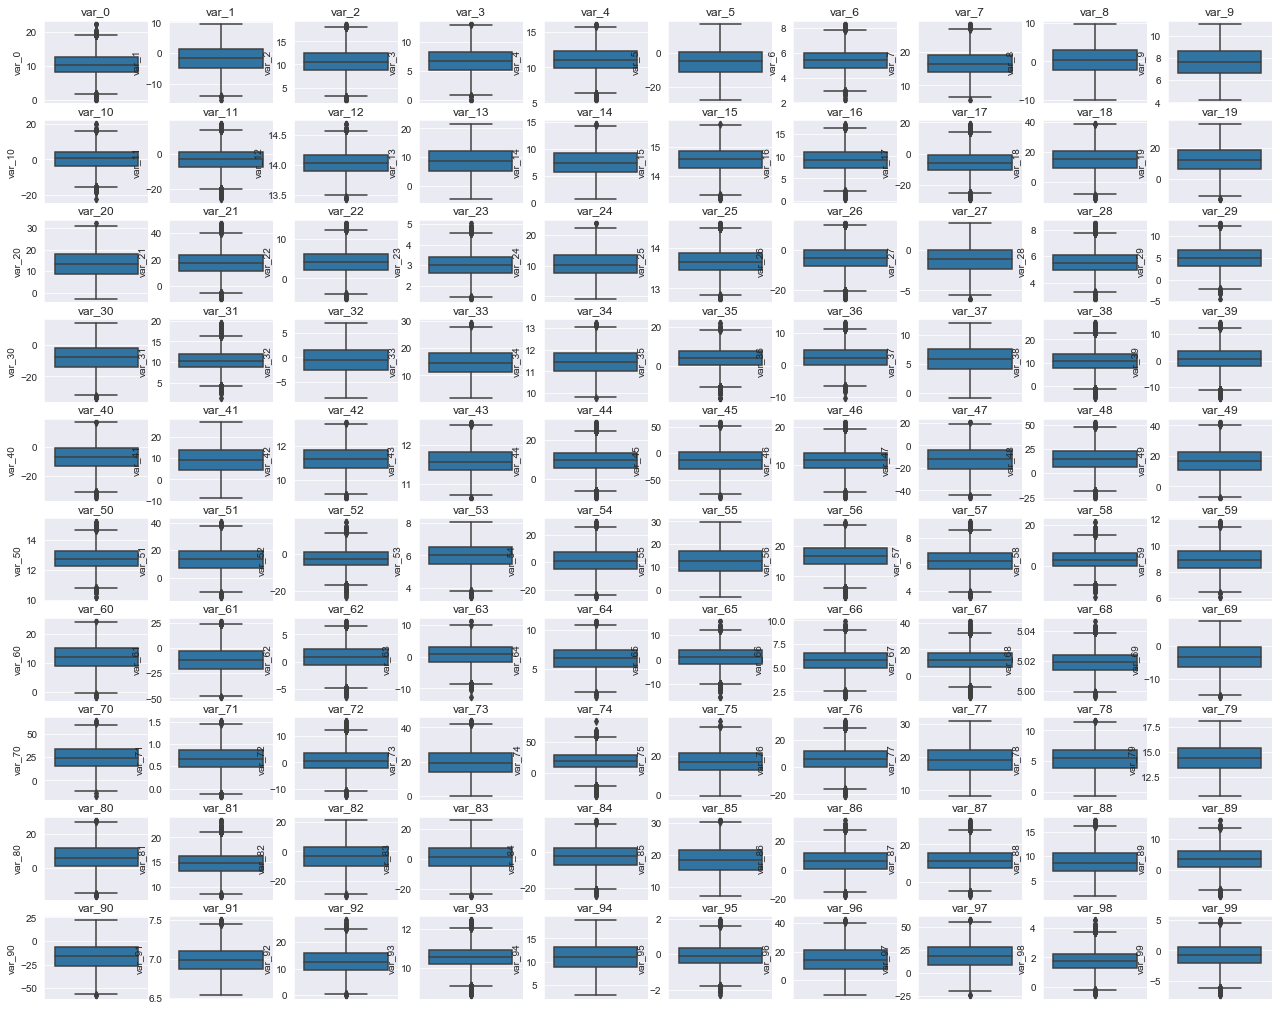

In [39]:
#Test Set Outlier Analysis from var_0 to var_99
numerical_features = test.columns[1:101]
print('Boxplot of Features')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y=test[col]) 
    plt.title(col)

Boxplot of Features


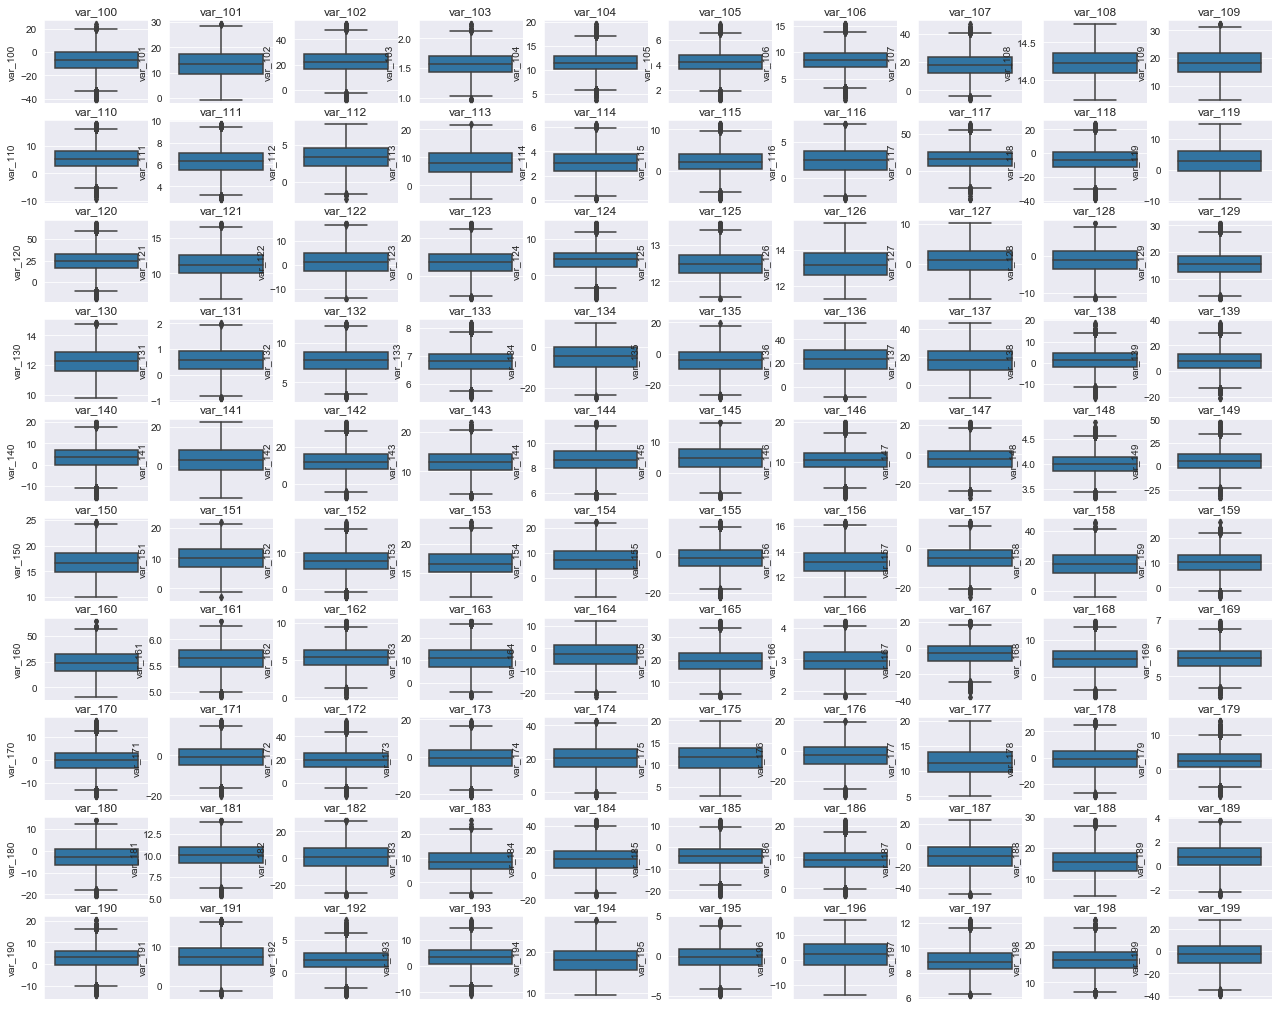

In [40]:
#Test Set Outlier Analysis from var_100 to var_199
numerical_features = test.columns[101:]
print('Boxplot of Features')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y=test[col]) 
    plt.title(col)

## Removing Outlier

In [41]:
columns = train.columns[2:]
for i in columns:
    q75,q25 = np.percentile(train.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    train = train.drop(train[train.loc[:,i] < min].index)
    train = train.drop(train[train.loc[:,i] > max].index)

Boxplot of Features


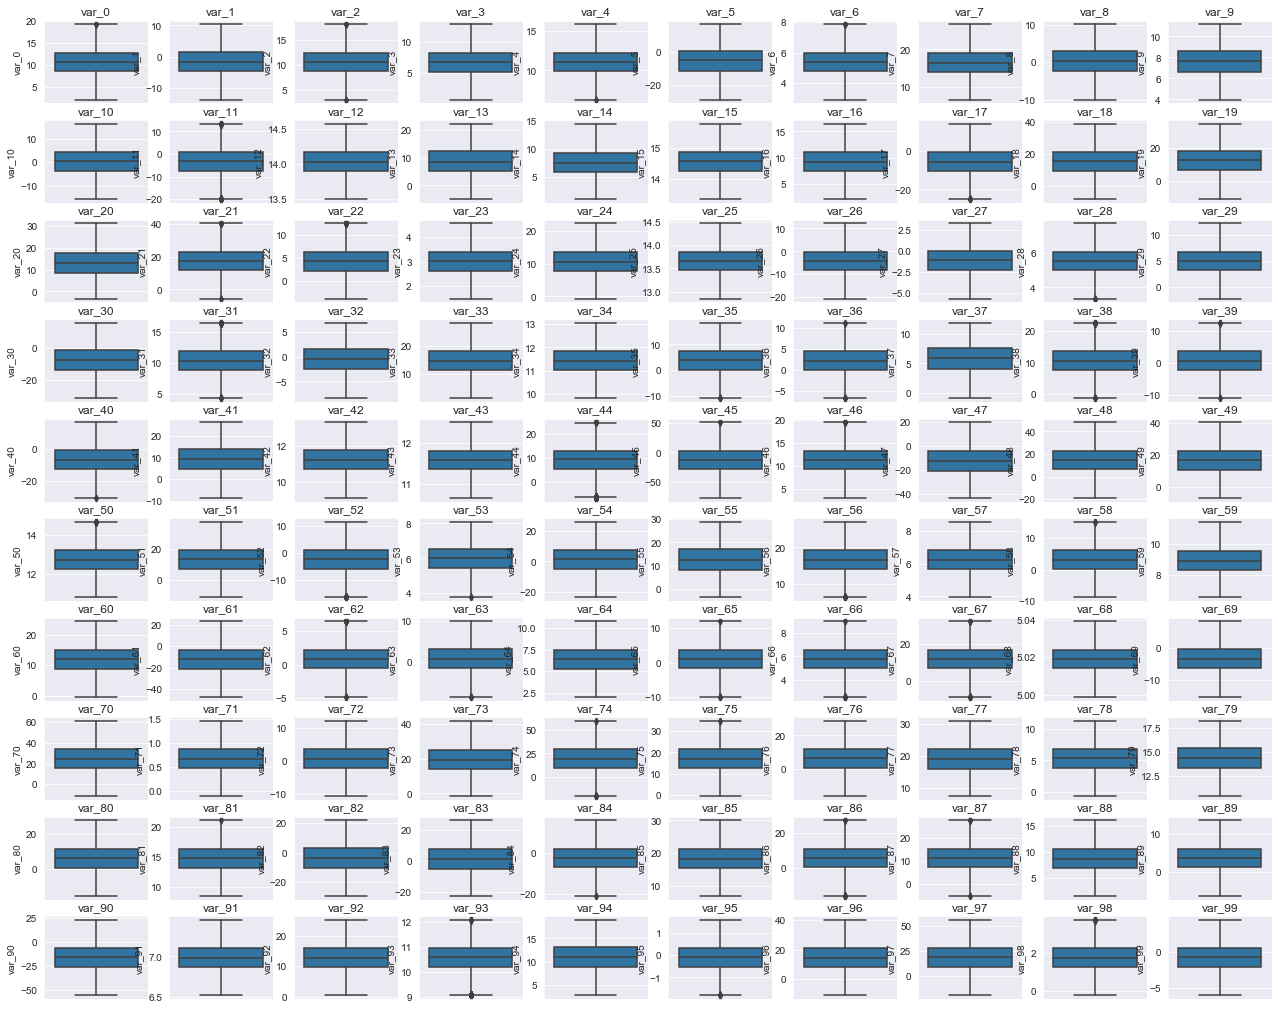

In [42]:
#Train Set Outlier Analysis from var_0 to var_99 after Removing Outliers
numerical_features = train.columns[2:102]
print('Boxplot of Features')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y=train[col]) 
    plt.title(col)

Boxplot of Features


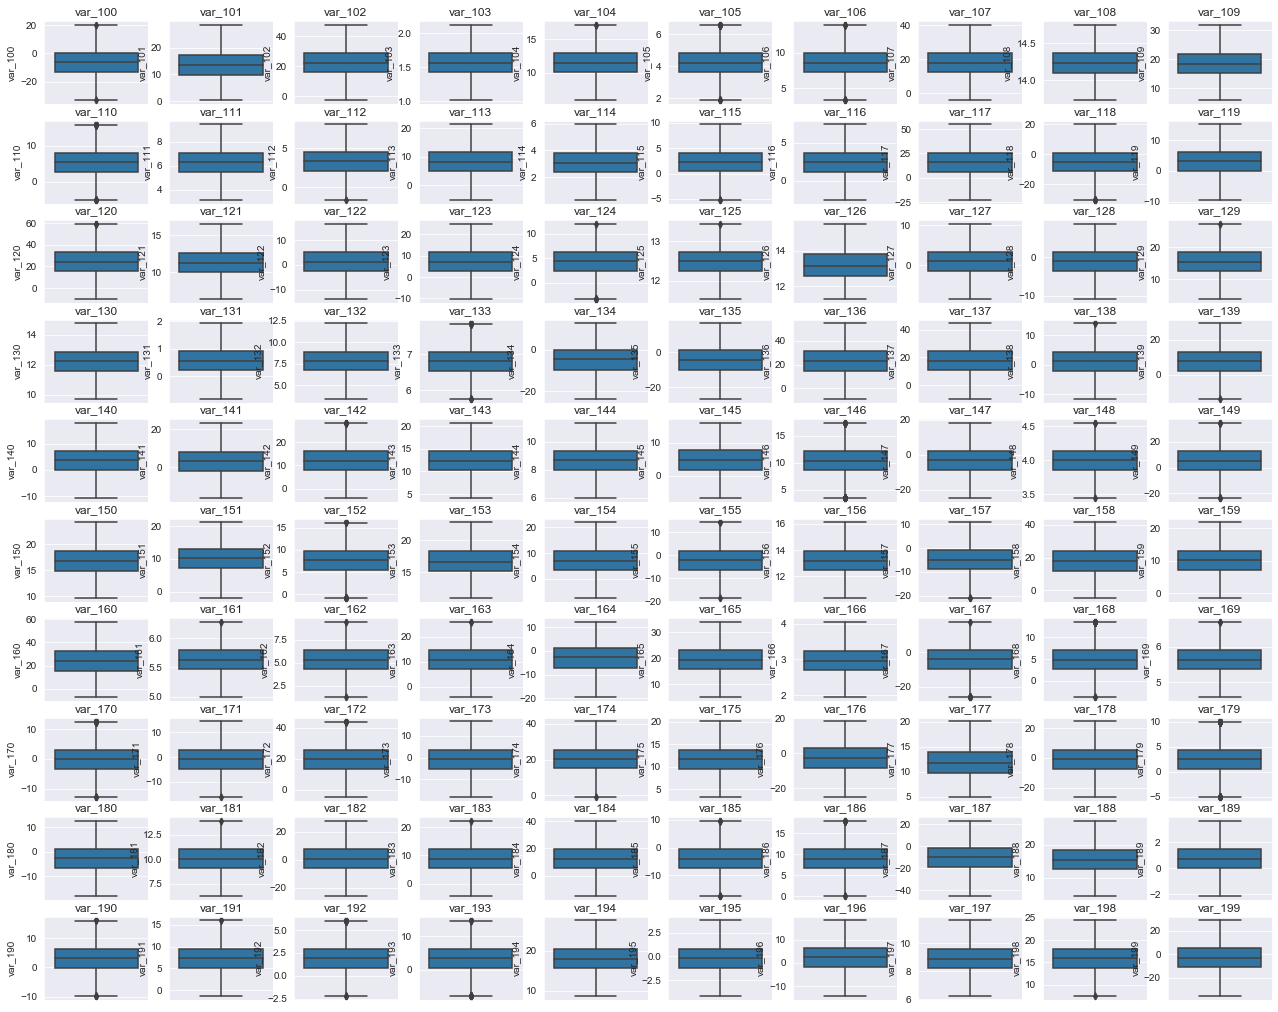

In [43]:
#Train Set Outlier Analysis from var_100 to var_199 after Removing Outliers
numerical_features = train.columns[102:]
print('Boxplot of Features')
plt.figure(figsize=(22,18))
sns.set_style('darkgrid')
for i, col in enumerate(numerical_features):
    plt.subplot(10, 10, i + 1)
    sns.boxplot(y=train[col]) 
    plt.title(col)

## Splitting The Dataset

In [44]:
X = train.drop(['ID_code','target'],axis=1)

In [45]:
y = train['target']

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)

In [49]:
X_val = scaler.transform(X_val)

## Feature Importance

Text(0.5, 0, 'Relative Importance')

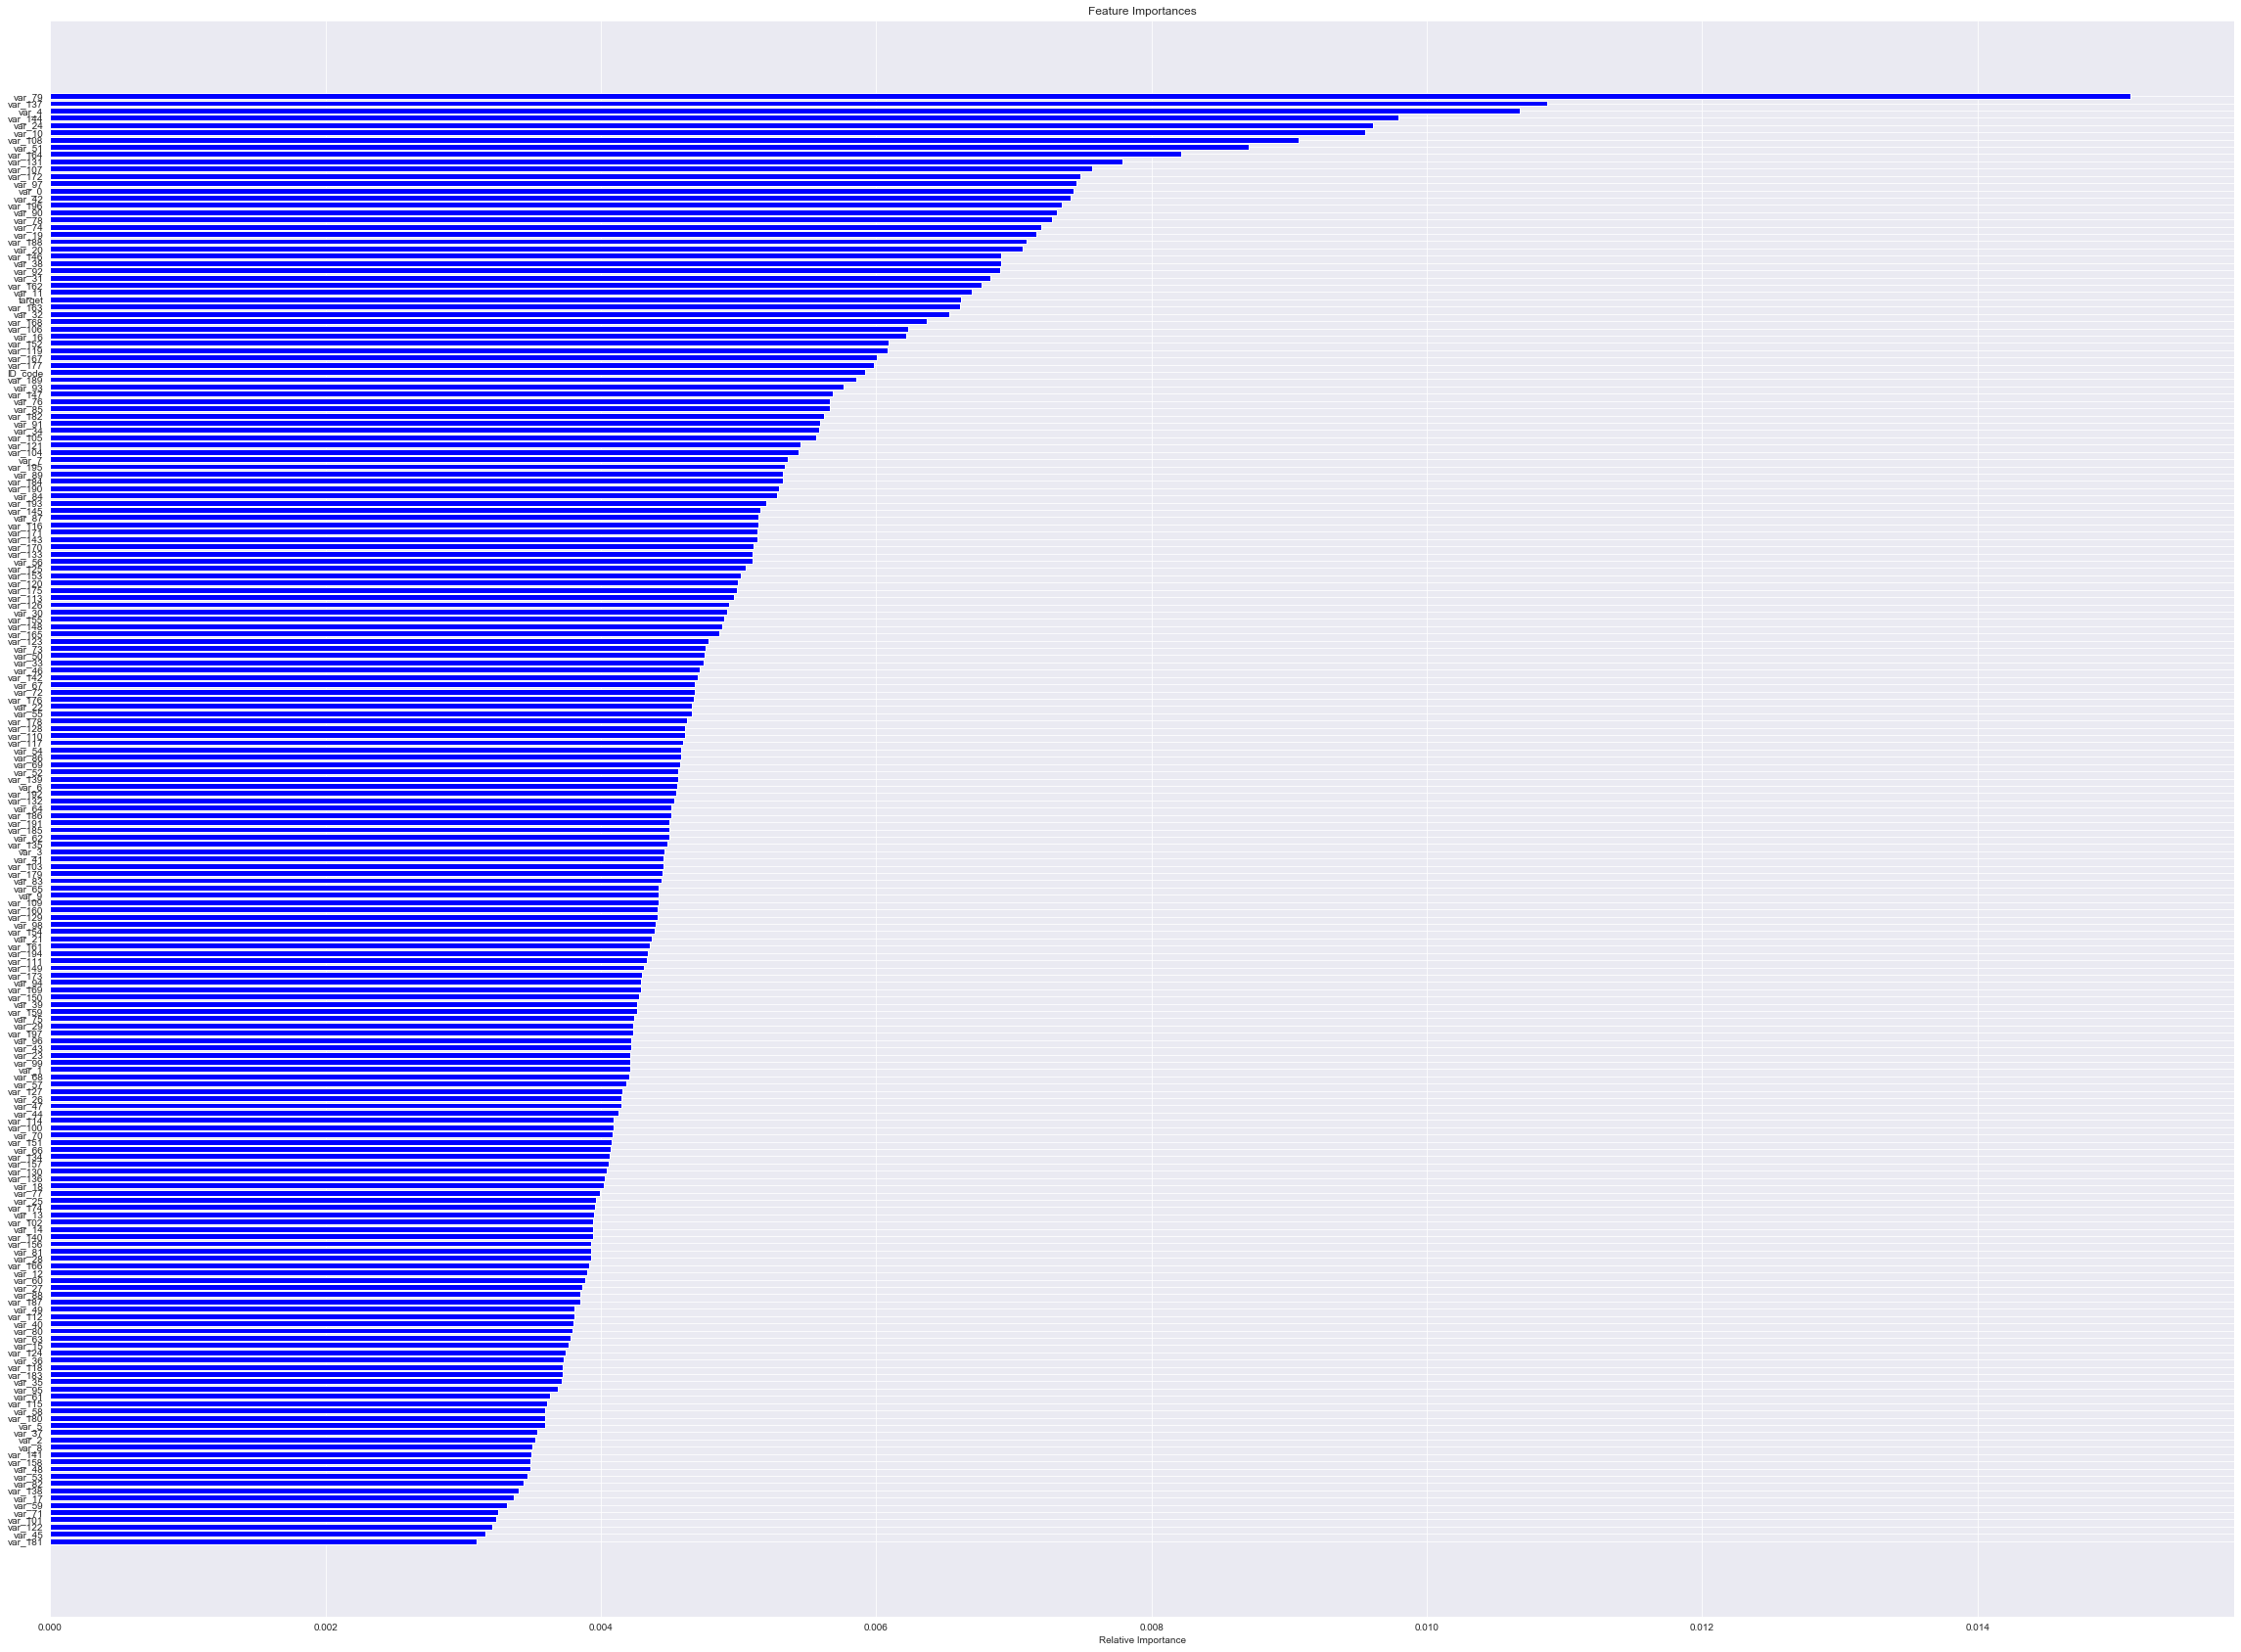

In [50]:
rfr = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 42)
rfr.fit(X_train,y_train)
features=train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(40,30))
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Principle Component Analysis

Text(0, 0.5, 'cumulative explained variance')

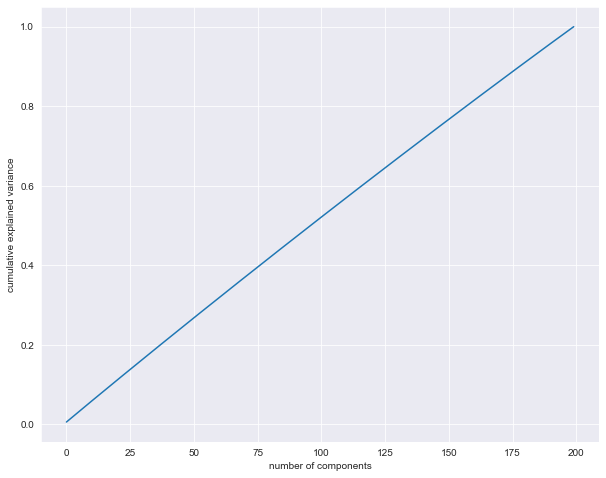

In [51]:
pca = PCA().fit(X_train)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Logistic Regression

In [52]:
#Hyperparameter Tunning
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.915628 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.915611 (0.001364) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.915611 (0.001364) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915606 (0.001367) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.915611 (0.001364) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.915611 (0.001364) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915606 (0.001367) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.915609 (0.001367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.915609 (0.001367) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915609 (0.001365) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.915628 (0.001363) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.915625 (0.001367) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.915611 (0.001346) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.915611 (0.001267) wit

In [53]:
lr = LogisticRegression(penalty='l2',C=0.1,solver='newton-cg')

In [54]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [55]:
pred_lr = lr.predict(X_val)

In [56]:
print('Classification Report\n\n',classification_report(y_val,pred_lr))
print('\n')
print('Confusion matrix\n\n',confusion_matrix(y_val,pred_lr))
print('\n')
print('Accuracy : ',accuracy_score(y_val,pred_lr))
print('\n')

Classification Report

               precision    recall  f1-score   support

           0       0.93      0.99      0.96     31705
           1       0.67      0.27      0.38      3310

    accuracy                           0.92     35015
   macro avg       0.80      0.63      0.67     35015
weighted avg       0.90      0.92      0.90     35015



Confusion matrix

 [[31268   437]
 [ 2418   892]]


Accuracy :  0.9184635156361559




In [57]:
print('AUC Score : ',roc_auc_score(y_val,pred_lr))
print('\n')
print('Precision Score : ',precision_score(y_val,pred_lr))
print('\n')
print('Recall Score : ',recall_score(y_val,pred_lr))
print('\n')
print('F1 Score : ',f1_score(y_val,pred_lr))
print('\n')

AUC Score :  0.627851544949642


Precision Score :  0.6711813393528969


Recall Score :  0.26948640483383685


F1 Score :  0.38456563914636777




In [58]:
print('Confusion matrix\n\n',confusion_matrix(y_val,pred_lr))
print('\nTrue Positives(TP) : ', confusion_matrix(y_val,pred_lr)[0,0])
print('\nTrue Negatives(TN) : ', confusion_matrix(y_val,pred_lr)[1,1])
print('\nFalse Positives(FP) : ', confusion_matrix(y_val,pred_lr)[0,1])
print('\nFalse Negatives(FN) : ', confusion_matrix(y_val,pred_lr)[1,0])

Confusion matrix

 [[31268   437]
 [ 2418   892]]

True Positives(TP) :  31268

True Negatives(TN) :  892

False Positives(FP) :  437

False Negatives(FN) :  2418


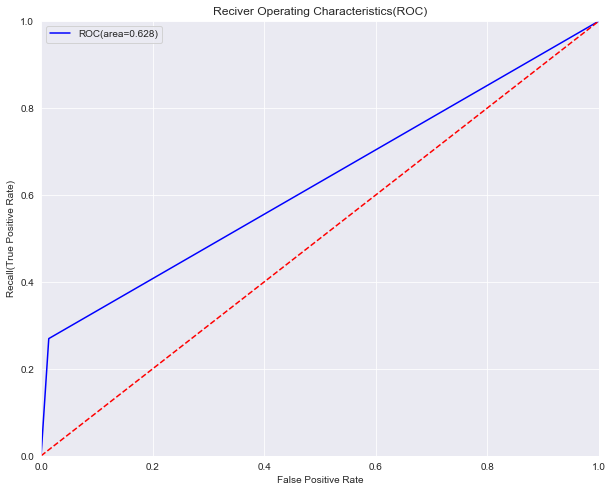

AUC: 0.627851544949642


In [59]:
#ROC_AUC_Curve:-
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
false_positive_rate,recall,thresholds=roc_curve(y_val,pred_lr)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

## Logistic Regression with Class Balancing(SMOTE)

## SMOTE(Synthetic Minority Over-sampling Technique)

In [60]:
sm = SMOTE()

In [61]:
X_train_smote,y_train_smote = sm.fit_sample(X_train,y_train)

In [62]:
y_train_smote.value_counts()

1    126265
0    126265
Name: target, dtype: int64

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [65]:
pred_lr_cb = lr.predict(X_val)

In [66]:
print('Classification Report\n\n',classification_report(y_val,pred_lr_cb))
print('\n')
print('Confusion matrix\n\n',confusion_matrix(y_val,pred_lr_cb))
print('\n')
print('Accuracy : ',accuracy_score(y_val,pred_lr_cb))
print('\n')

Classification Report

               precision    recall  f1-score   support

           0       0.97      0.78      0.87     31705
           1       0.27      0.77      0.40      3310

    accuracy                           0.78     35015
   macro avg       0.62      0.78      0.64     35015
weighted avg       0.90      0.78      0.82     35015



Confusion matrix

 [[24862  6843]
 [  750  2560]]


Accuracy :  0.7831500785377695




In [67]:
print('AUC Score : ',roc_auc_score(y_val,pred_lr_cb))
print('\n')
print('Precision Score : ',precision_score(y_val,pred_lr_cb))
print('\n')
print('Recall Score : ',recall_score(y_val,pred_lr_cb))
print('\n')
print('F1 Score : ',f1_score(y_val,pred_lr_cb))
print('\n')

AUC Score :  0.7787902162638867


Precision Score :  0.27225353610549824


Recall Score :  0.7734138972809668


F1 Score :  0.40273735546291195




In [68]:
print('Confusion matrix\n\n',confusion_matrix(y_val,pred_lr_cb))
print('\nTrue Positives(TP) : ', confusion_matrix(y_val,pred_lr_cb)[0,0])
print('\nTrue Negatives(TN) : ', confusion_matrix(y_val,pred_lr_cb)[1,1])
print('\nFalse Positives(FP) : ', confusion_matrix(y_val,pred_lr_cb)[0,1])
print('\nFalse Negatives(FN) : ', confusion_matrix(y_val,pred_lr_cb)[1,0])

Confusion matrix

 [[24862  6843]
 [  750  2560]]

True Positives(TP) :  24862

True Negatives(TN) :  2560

False Positives(FP) :  6843

False Negatives(FN) :  750


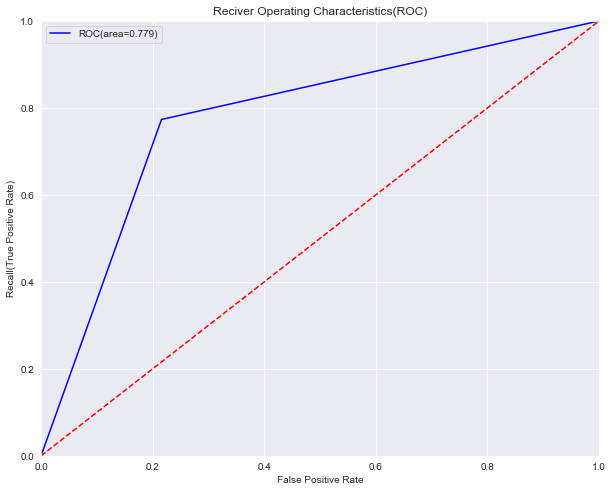

AUC: 0.7787902162638867


In [69]:
#ROC_AUC_Curve:-
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
false_positive_rate,recall,thresholds=roc_curve(y_val,pred_lr_cb)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

## LightBGM

In [70]:
#Training data-
lgb_train=lgb.Dataset(X_train,label=y_train)
lgb_val = lgb.Dataset(X_val,label=y_val)

In [71]:
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [72]:
num_round = 1000000
lgbm = lgb.train(params, lgb_train, num_round, valid_sets = [lgb_train, lgb_val], 
                verbose_eval=1000, early_stopping_rounds = 2000)

[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.08, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.08
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Info] Number of positive: 13793, number of negative: 126265
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[

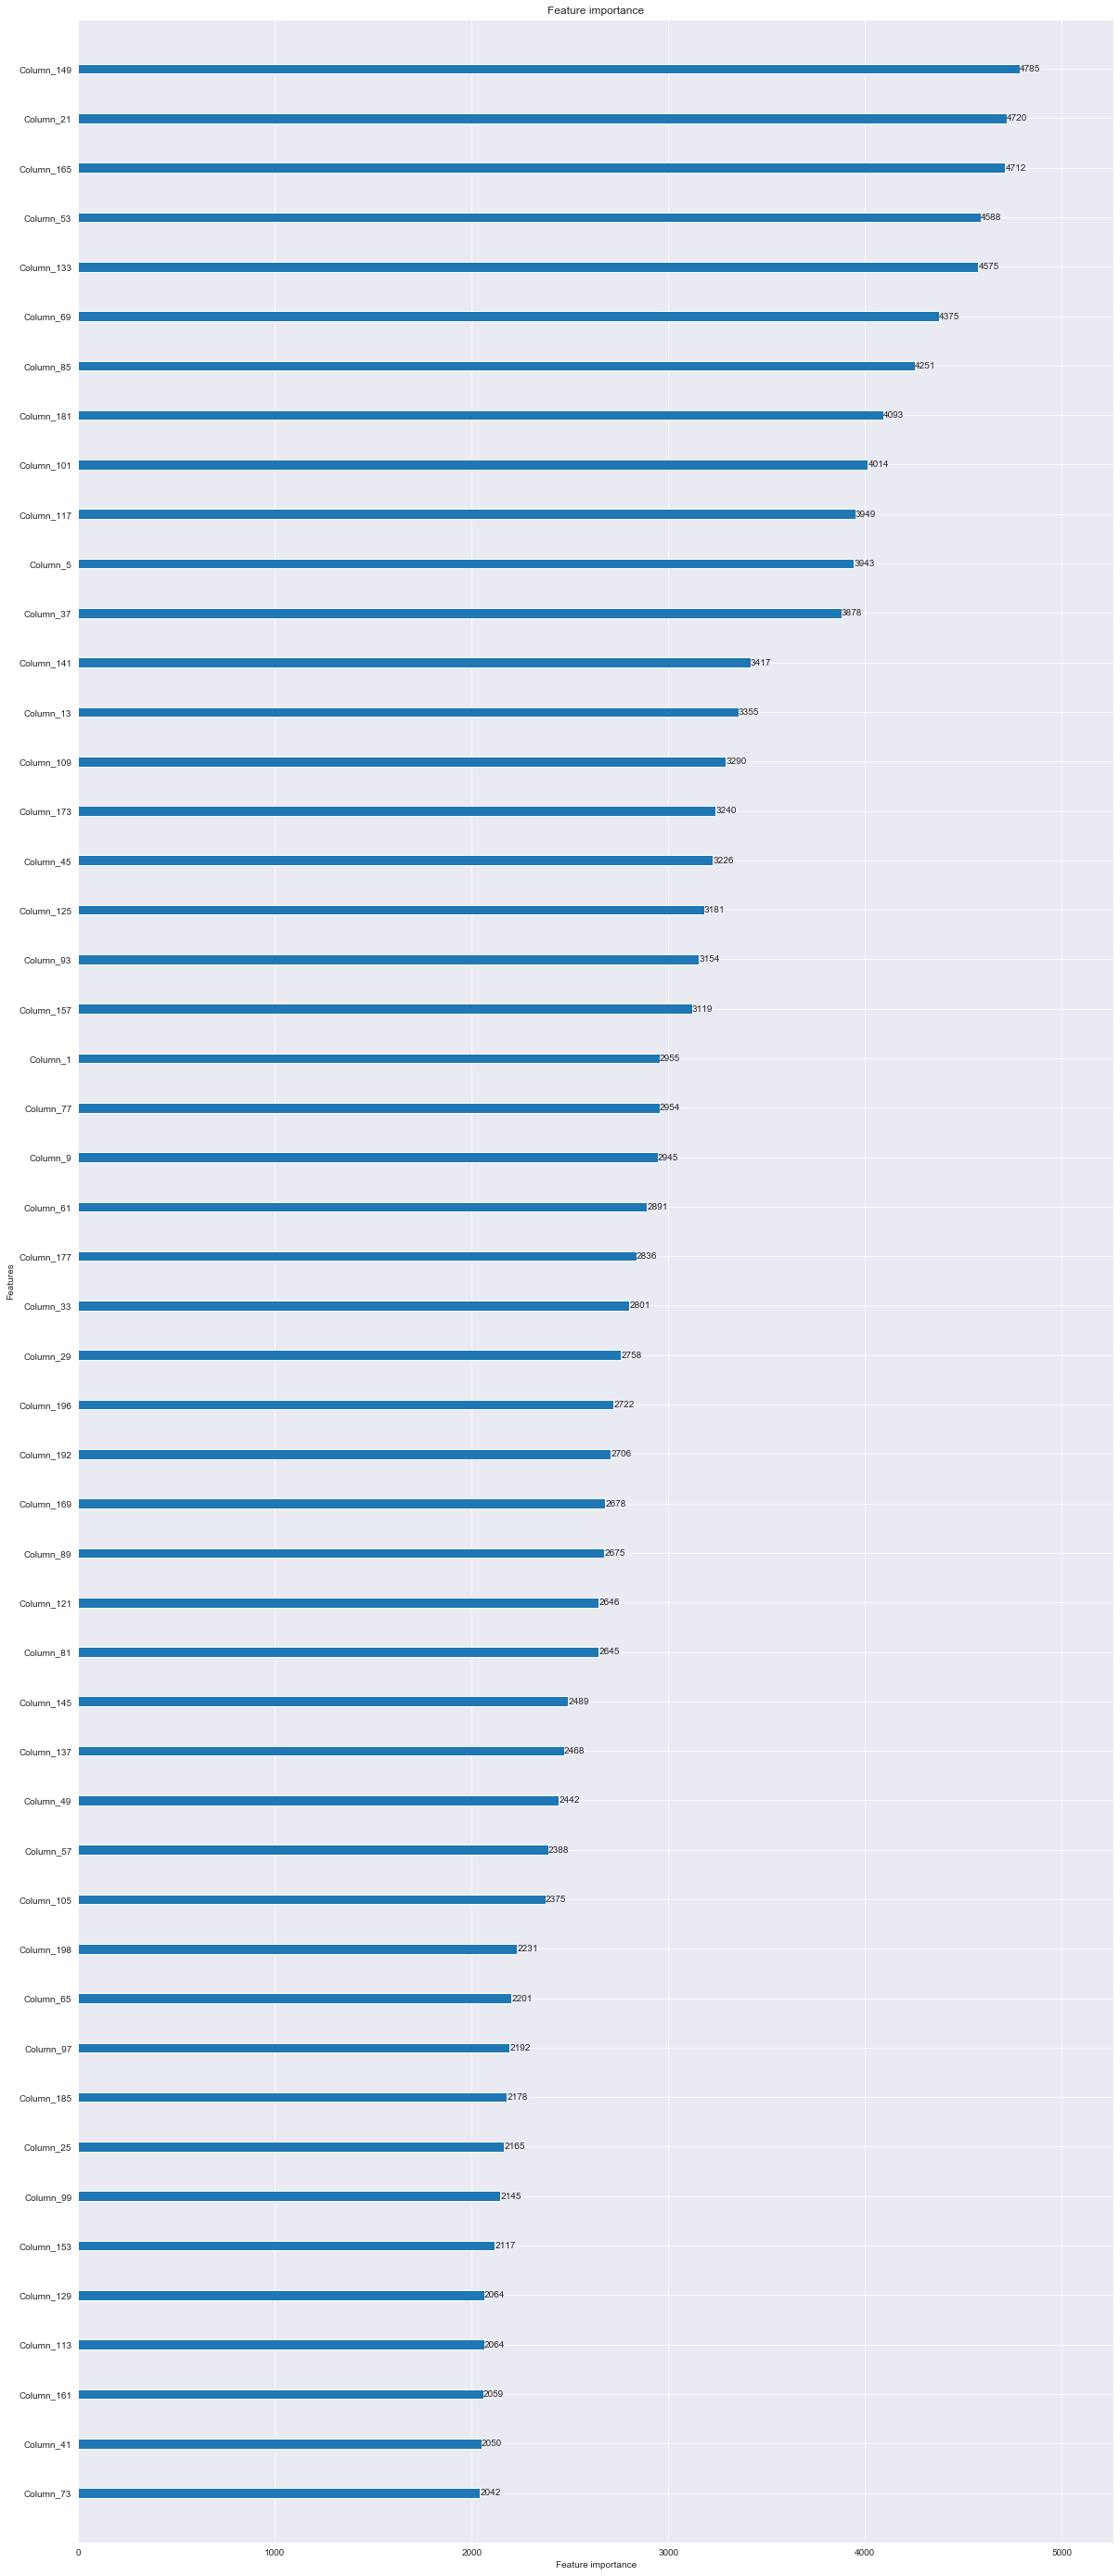

In [73]:
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [74]:
#probability predictions
lgbm_predict_prob=lgbm.predict(X_val,random_state=42,num_iteration=lgbm.best_iteration)

In [75]:
#Convert to binary output 1 or 0
pred_lgbm=np.where(lgbm_predict_prob>=0.5,1,0)

In [76]:
print('Classification Report\n\n',classification_report(y_val,pred_lgbm))
print('\n')
print('Confusion matrix\n\n',confusion_matrix(y_val,pred_lgbm))
print('\n')
print('Accuracy : ',accuracy_score(y_val,pred_lgbm))
print('\n')

Classification Report

               precision    recall  f1-score   support

           0       0.96      0.93      0.94     31705
           1       0.48      0.63      0.54      3310

    accuracy                           0.90     35015
   macro avg       0.72      0.78      0.74     35015
weighted avg       0.91      0.90      0.91     35015



Confusion matrix

 [[29438  2267]
 [ 1237  2073]]


Accuracy :  0.8999286020277024




In [77]:
print('AUC Score : ',roc_auc_score(y_val,pred_lgbm))
print('\n')
print('Precision Score : ',precision_score(y_val,pred_lgbm))
print('\n')
print('Recall Score : ',recall_score(y_val,pred_lgbm))
print('\n')
print('F1 Score : ',f1_score(y_val,pred_lgbm))
print('\n')

AUC Score :  0.777390535197256


Precision Score :  0.47764976958525346


Recall Score :  0.6262839879154078


F1 Score :  0.5419607843137255




In [78]:
print('Confusion matrix\n\n',confusion_matrix(y_val,pred_lgbm))
print('\nTrue Positives(TP) : ', confusion_matrix(y_val,pred_lgbm)[0,0])
print('\nTrue Negatives(TN) : ', confusion_matrix(y_val,pred_lgbm)[1,1])
print('\nFalse Positives(FP) : ', confusion_matrix(y_val,pred_lgbm)[0,1])
print('\nFalse Negatives(FN) : ', confusion_matrix(y_val,pred_lgbm)[1,0])

Confusion matrix

 [[29438  2267]
 [ 1237  2073]]

True Positives(TP) :  29438

True Negatives(TN) :  2073

False Positives(FP) :  2267

False Negatives(FN) :  1237


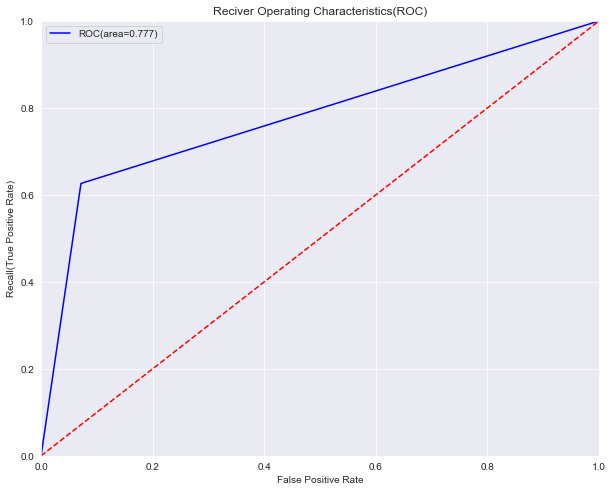

AUC: 0.777390535197256


In [79]:
#ROC_AUC_Curve:-
plt.figure(figsize=(10,8))
false_positive_rate,recall,thresholds=roc_curve(y_val,pred_lgbm)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1])
plt.ylim([0.0,1])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

## Selecting Final Model

In [80]:
#After looking at the precision score,recall score,f1 score,auc score and accuracy 
#it turned out that theLGBM is the best available model. 
#Hence We will use the LGBM model to predict on the Test Dataset

## Predicting on Test Set

In [89]:
test_set = scaler.transform(test.iloc[:,1:201])

In [82]:
test['target'] = lgbm.predict(test_set,random_state=42,num_iteration=lgbm.best_iteration)

In [83]:
test['target']=np.where(test['target']>=0.5,1,0)

In [84]:
test['target'].value_counts()

0    176664
1     23336
Name: target, dtype: int64

In [ ]:
test.head()